In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score
from sklearn.model_selection import cross_val_score

In [3]:
dataset = pd.read_csv('/Users/vladpivovarov/Documents/Python/Udemy-2/5.Data/P39-CS3-Data/appdata10.csv')

In [5]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
user                    50000 non-null int64
first_open              50000 non-null object
dayofweek               50000 non-null int64
hour                    50000 non-null int64
age                     50000 non-null int64
screen_list             50000 non-null object
numscreens              50000 non-null int64
minigame                50000 non-null int64
used_premium_feature    50000 non-null int64
enrolled                50000 non-null int64
enrolled_date           31074 non-null object
liked                   50000 non-null int64
dtypes: int64(9), object(3)
memory usage: 4.6+ MB


In [6]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
dataset['hour'] = dataset.hour.str.slice(1,3).astype(int)

In [9]:
dataset['hour']

0         2
1         1
2        19
3        16
4        18
5         9
6         2
7         3
8        14
9        18
10        4
11       11
12        6
13       19
14        4
15       18
16       16
17       21
18        5
19       17
20        9
21        4
22       17
23        2
24       20
25       18
26       16
27        1
28       11
29       17
         ..
49970    15
49971    11
49972    15
49973    18
49974    20
49975    18
49976    20
49977    15
49978    17
49979    14
49980     7
49981     4
49982     2
49983    13
49984    16
49985    23
49986    18
49987    19
49988     2
49989    17
49990    17
49991    22
49992    15
49993     2
49994    19
49995    13
49996     0
49997    22
49998    12
49999     1
Name: hour, Length: 50000, dtype: int64

In [14]:
dataset2 = dataset.copy().drop(columns = ['user','screen_list','enrolled_date','first_open','enrolled'])

In [15]:
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


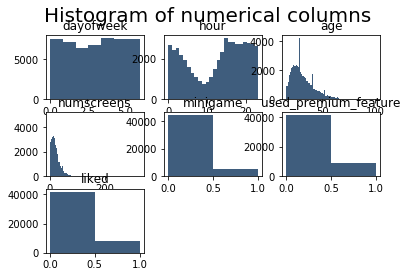

In [21]:
#Histograms
plt.suptitle('Histogram of numerical columns', fontsize = 20)
for i in range(1,dataset2.shape[1] + 1):
    plt.subplot(3,3,i)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i - 1])
#    plt.figure(figsize=(3,4))
    vals = np.size(dataset2.iloc[:,i - 1].unique())
    plt.hist(dataset2.iloc[:,i - 1], bins = vals, color = '#3F5D7D')
    
    

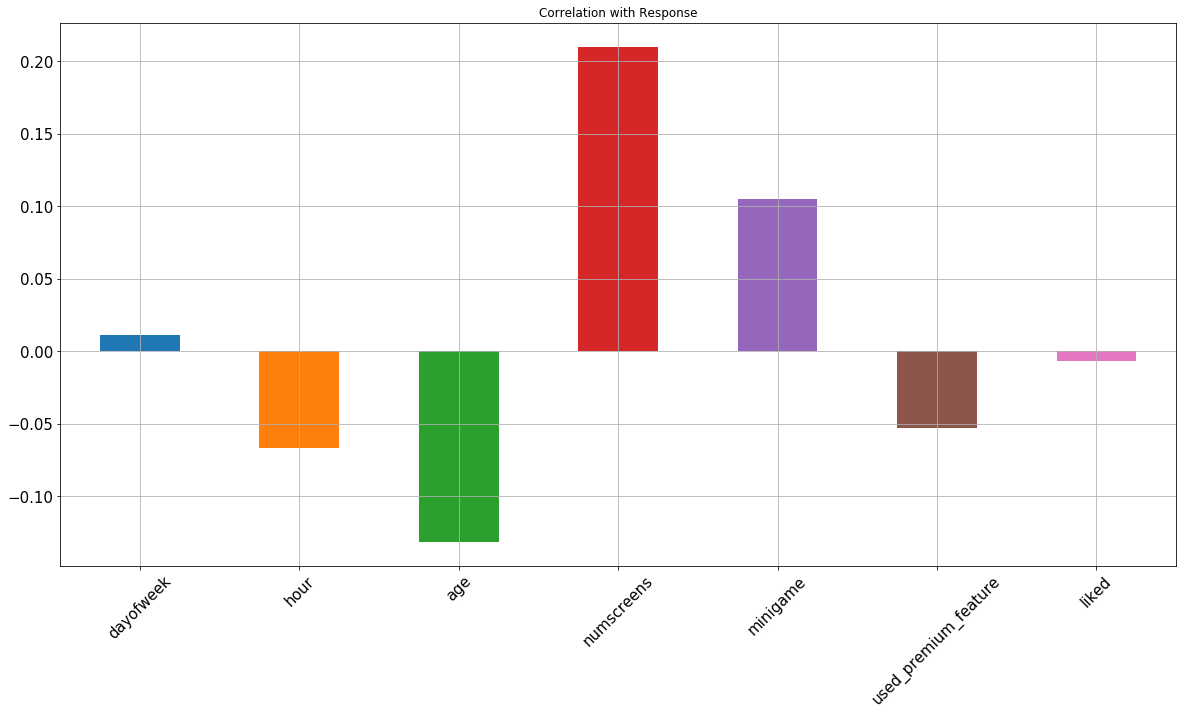

In [27]:
#Correlation with Respose
dataset2.corrwith(dataset.enrolled).plot.bar(figsize=(20,10), 
                                             title='Correlation with Response', 
                                             fontsize=15, rot=45, grid=True)

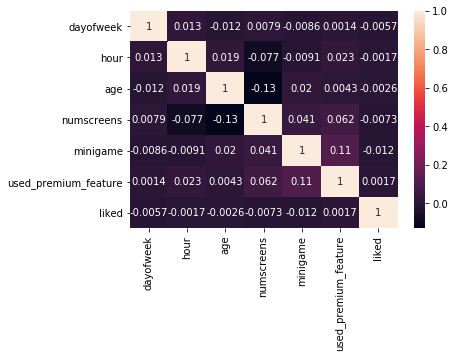

In [28]:
#Correlation Matrix
sns.heatmap(dataset2.corr(), annot=True)


In [32]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [36]:
dataset3 = dataset.copy().drop(columns = ['user','first_open','screen_list','enrolled_date','first_open'])

In [37]:
dataset3.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1


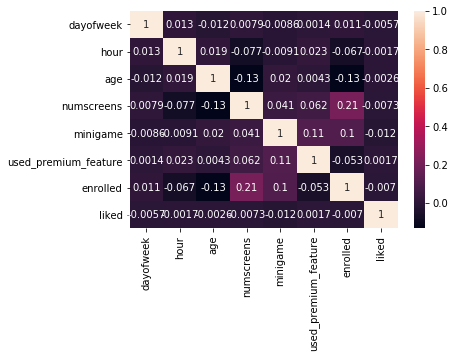

In [38]:
sns.heatmap(dataset3.corr(), annot=True)

In [41]:
# Feature Engineering
# Date Features
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [42]:
dataset['first_open'] = [parser.parse(row_data) for row_data in dataset['first_open']]
dataset['enrolled_date'] = [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in dataset['enrolled_date']]


In [43]:
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [44]:
dataset['difference'] = (dataset.enrolled_date - dataset.first_open).astype('timedelta64[h]')

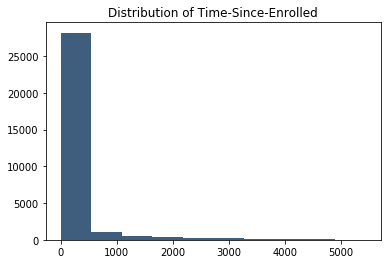

In [48]:
plt.hist(dataset['difference'].dropna(), color='#3F5D7D')
plt.title('Distribution of Time-Since-Enrolled')
plt.show()

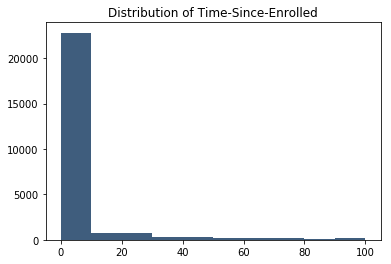

In [53]:
plt.hist(dataset['difference'].dropna(), color='#3F5D7D', range=[0,100])
plt.title('Distribution of Time-Since-Enrolled')
plt.show()

In [54]:
dataset.loc[dataset.difference>48,'enrolled'] = 0

In [62]:
dataset = dataset.drop(columns=['difference','enrolled_date','first_open'])

In [63]:
dataset.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


In [ ]:
# Feature Engineering
# Screens

In [67]:
top_screens = pd.read_csv('/Users/vladpivovarov/Documents/Python/Udemy-2/5.Data/P39-CS3-Data/top_screens.csv').top_screens.values

In [68]:
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [70]:
dataset['screen_list'] = dataset.screen_list.astype(str) + ','

In [74]:
for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset['screen_list'] = dataset.screen_list.str.replace(sc+',','')

In [77]:
dataset['Other'] = dataset.screen_list.str.count(',')

In [78]:
dataset = dataset.drop(columns = ['screen_list'])

In [95]:
#Funnels
savings_screen = ['Saving1',
                 'Saving2',
                 'Saving2Amount',
                 'Saving4',
                 'Saving5',
                 'Saving6',
                 'Saving7',
                 'Saving8',
                 'Saving9',
                 'Saving10']

dataset['SavingsCount'] = dataset[savings_screen].sum(axis=1)
dataset = dataset.drop(columns = savings_screen)

In [98]:
#Funnels
cm_screens = ['Credit1',
                 'Credit2',
                 'Credit3',
                 'Credit3Container',
                 'Credit3Dashboard']

dataset['CMCount'] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns = cm_screens)

In [100]:
#Funnels
cc_screens = ['CC1',
                 'CC1Category',
                 'CC3']

dataset['CCount'] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns = cc_screens)

In [102]:
#Funnels
loan_screens = ['Loan',
                 'Loan2',
                 'Loan3',
                 'Loan4',]

dataset['LoansCount'] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns = loan_screens)

In [106]:
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Other',
       'SavingsCount', 'CMCount', 'CCount', 'LoansCount'],
      dtype='object')

In [104]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMCount,CCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [107]:
dataset.to_csv('new_appdata10.csv', index=False)

In [111]:
response = dataset['enrolled']
dataset = dataset.drop(columns = 'enrolled')

In [113]:
X_train, X_test, y_train, y_test = train_test_split(dataset, response, test_size=0.2, random_state=0)

In [114]:
train_identifier = X_train['user']
X_train = X_train.drop(columns = 'user')

In [115]:
test_identifier = X_test['user']
X_test = X_test.drop(columns = 'user')

In [117]:
sc_X = StandardScaler()

In [118]:
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [121]:
X_test2 = pd.DataFrame(sc_X.transform(X_test))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [123]:
X_train2.columns = X_train.columns.values

In [124]:
X_test2.columns = X_test.columns.values

In [126]:
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

In [130]:
X_train = X_train2
X_test = X_test2

In [131]:
#Model Building

In [133]:
classifier = LogisticRegression(random_state=0, penalty='L1')

In [134]:
classifier.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [135]:
y_pred = classifier.predict(X_test)

In [141]:
cm = confusion_matrix(y_test, y_pred)

In [142]:
cm

array([[3885, 1187],
       [1133, 3795]])

In [143]:
accuracy_score(y_test, y_pred)

0.768

In [144]:
precision_score(y_test, y_pred)

0.7617422721798475

In [145]:
recall_score(y_test, y_pred)

0.7700892857142857

In [146]:
f1_score(y_test, y_pred)

0.7658930373360243

The Data Accuracy: 0.768


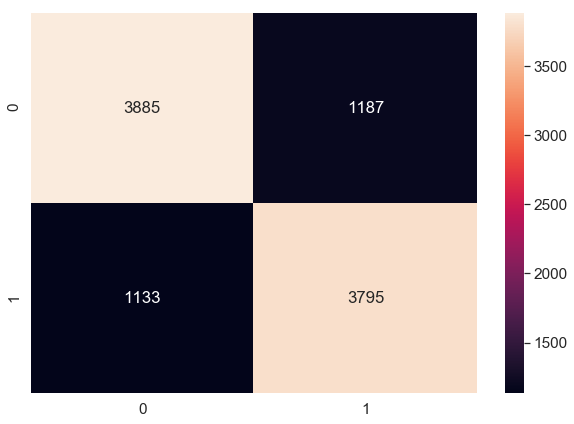

In [151]:
df_cm = pd.DataFrame(cm, index=(0,1), columns=(0,1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print('The Data Accuracy:', accuracy_score(y_test, y_pred))

In [153]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv=10)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [154]:
accuracies

array([0.7688078 , 0.7668083 , 0.7765    , 0.7665    , 0.765     ,
       0.76775   , 0.7625    , 0.76725   , 0.77244311, 0.75868967])

In [177]:
print('Logistics Accuracy: %0.3f (+/- %0.3f)' % (accuracies.mean(), accuracies.std() * 2))

Logistics Accuracy: 0.767 (+/- 0.009)


In [178]:
#Model Conclusion

In [183]:
final_results = pd.concat([y_test, test_identifier], axis=1).dropna()
final_results['predicted'] = y_pred
final_results[['user','enrolled','predicted']].reset_index(drop=True)

,user,enrolled,predicted
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
5,65042,1,0
6,207226,1,1
7,363062,0,0
8,152296,1,1
9,64484,0,0
